This notebook analyzes how items are ordered together at Chipotle. Specifically, it shows that:
* Orders containing a vegetarian item are less like to also contain soda, compared to no veggie items
* Orders for a burrito bowl are more often accompanied by chips and bottled water compared to orders that only contain burritos.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=1000

In [2]:
# Load data of Chipotle orders
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


# Determine item presence in each order

In [3]:
# Define items of interest
main_items = ['Bowl', 'Burrito', 'Veggie', 'Chicken Burrito', 'Steak Burrito', 'Chips', 'Bottled Water']

# Determine which orders contain each item of interest
orders = {}
for i in main_items:
    orders[i] = df[df['item_name'].str.contains(i)]['order_id'].unique()
sodas = ['Canned Soft Drink', 'Canned Soda', '6 Pack Soft Drink', 'Izze']
orders['soda'] = df[df['item_name'].isin(sodas)]['order_id'].unique()

# For each order, determine if each is present
df_orders = pd.DataFrame({'order': df['order_id'].unique()})
for i in orders.keys():
    df_orders[i] = df_orders['order'].isin(orders[i])
df_orders.set_index('order', inplace=True)
df_orders.head()

,Bowl,Burrito,Veggie,Chicken Burrito,Steak Burrito,Chips,Bottled Water,soda
order,,,,,,,,
1,False,False,False,False,False,True,False,True
2,True,False,False,False,False,False,False,False
3,True,False,False,False,False,True,False,False
4,False,True,False,False,True,False,False,False
5,False,True,False,False,True,True,False,False


# Purchasing differences with vegitarian items

/Users/scott/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


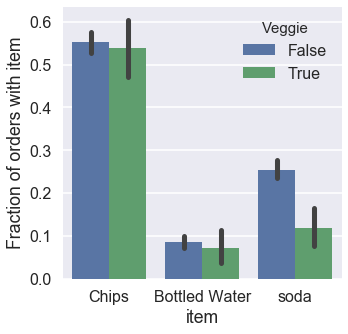

In [4]:
df_plt = df_orders.set_index('Veggie')
df_plt = df_plt.stack().reset_index().rename(columns={'level_1': 'item', 0: 'value'})
df_plt = df_plt[df_plt['item'].isin(['Chips', 'Bottled Water', 'soda'])]
plt.figure(figsize=(5,5))
with sns.plotting_context('poster'):
    sns.barplot(x='item', hue='Veggie', y='value', data=df_plt)
plt.ylabel('Fraction of orders with item')

# Purchasing differences between burritos and bowls

/Users/scott/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


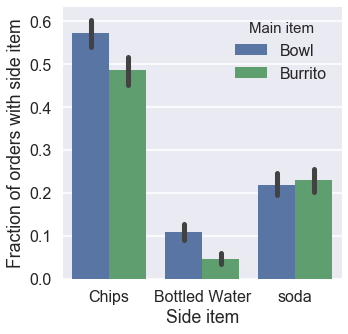

In [5]:
# Differentiate orders for bowls and burritos
cols_keep = ['Chips', 'Bottled Water', 'soda']
df_bowl = df_orders[df_orders['Bowl']][cols_keep]
df_bowl['Main item'] = 'Bowl'
df_burrito = df_orders[df_orders['Burrito']][cols_keep]
df_burrito['Main item'] = 'Burrito'
df_bb = pd.concat([df_bowl, df_burrito])

# Make figure
df_plt = df_bb.set_index('Main item')
df_plt = df_plt.stack().reset_index().rename(columns={'level_1': 'Side item', 0: 'value'})
df_plt = df_plt[df_plt['Side item'].isin(cols_keep)]
plt.figure(figsize=(5,5))
with sns.plotting_context('poster'):
    sns.barplot(x='Side item', hue='Main item', y='value', data=df_plt)
plt.ylabel('Fraction of orders with side item')